# Jupyter code

## Importing Libraries

In [2]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# NLP for text pre-processing
import nltk
import scipy
import re
from scipy import spatial
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
tokenizer = ToktokTokenizer()

# other libraries
import gensim
from gensim.models import Word2Vec
import itertools
from sklearn.decomposition import PCA
from sklearn.feature_extraction. text import TfidfVectorizer
from sklearn.decomposition import PCA

# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# remove warnings
import warnings
warnings.filterwarnings (action = 'ignore')

In [3]:
data = pd.read_csv("/content/flipkart_com-ecommerce_sample.csv") # Changed the file path
data.head()

,uniq_id,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


## Data Exploration - jupyter file

## Data Preprocessing

In [4]:
data.isnull().sum()

,0
uniq_id,0
product_url,0
product_name,0
product_category_tree,0
pid,0
retail_price,78
discounted_price,78
image,3
is_FK_Advantage_product,0
description,2


In [5]:
#handling missing values
missing = pd.DataFrame(data.isnull().sum()).rename (columns = {0: 'missing' })
missing['percent'] = (missing['missing'] /len(data))*100
missing.sort_values ('percent', ascending = False)

,missing,percent
brand,5864,29.320
retail_price,78,0.390
discounted_price,78,0.390
product_specifications,14,0.070
image,3,0.015
description,2,0.010
uniq_id,0,0.000
product_url,0,0.000
product_name,0,0.000
product_category_tree,0,0.000


In [6]:
# fing ing the redundant or duplicate rows and removingthem

duplicate_rows = data[data.duplicated()]

# Print the number of duplicate rows found
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Display the duplicate rows (if any)
if duplicate_rows.shape[0] > 0:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

# Remove duplicate rows and keep the first occurrence
data_cleaned = data.drop_duplicates()

# Verify the result by checking the new shape of the dataset
print(f"Original dataset shape: {data.shape}")
print(f"Dataset shape after removing duplicates: {data_cleaned.shape}")


Number of duplicate rows: 0
No duplicate rows found.
Original dataset shape: (20000, 14)
Dataset shape after removing duplicates: (20000, 14)


### Text preprocessing

There is a lot of unwanted information present in the text data. Let's clean it up. Text preprocessing tasks include

* Converting the text data to lowercase
* Removing/replacing the punctuations
* Removing/replacing the numbers
* Removing extra whitespaces
* Removing stop words
* Stemming and lemmatization

In [7]:
#to lowercase
data['description'] = data['description'].str.lower()

#removing punctivations
data['description'] = data['description'].str.replace(r'[^\w\d\s]',' ')

#replacing whitespace between terms with a single space
data['description'] = data['description'].str.replace(r'\s+',' ')

#removing leading and trailing whitespace
data['description'] = data['description'].str.replace(r'^\s+|\s+?$','')

data['description'].head()

,description
0,key features of alisha solid women's cycling s...
1,fabhomedecor fabric double sofa bed (finish co...
2,key features of aw bellies sandals wedges heel...
3,key features of alisha solid women's cycling s...
4,specifications of sicons all purpose arnica do...


In [8]:
import nltk
nltk.download('stopwords')

#Removing stop words
stop=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
import re

pattern = r'\b(?:{})\b'.format('|'.join(stop))
data['description'] = data['description'].str.replace(pattern, '')

# Removing single characters
data['description'] = data['description'].str.replace(r'\s+', ' ')
data['description'] = data['description'].apply(lambda x: " ".join([word for word in str(x).split() if len(word) > 1]))

# Removing domain related stop words from description
specific_stop_words = ["rs", "flipkart", "buy", "com", "free", "day", "cash", "replacement", "guarantee", "genuine", "key", "feature", "delivery", "products", "product", "shipping", "online", "india", "shop"]
data['description'] = data['description'].apply(lambda x: " ".join(word for word in str(x).split() if word not in specific_stop_words))

data['description'].head()

,description
0,features of alisha solid women's cycling short...
1,fabhomedecor fabric double sofa bed (finish co...
2,features of aw bellies sandals wedges heel cas...
3,features of alisha solid women's cycling short...
4,specifications of sicons all purpose arnica do...


### Visualizing the most occured words in corpus

In [10]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

[('women', 10547), ('color', 5631), ('specifications', 5145), ('men', 5027), ('casual', 4920), ('fabric', 4910), ('material', 4855), ('general', 4772), ('collection', 4615), ('set', 4439)]


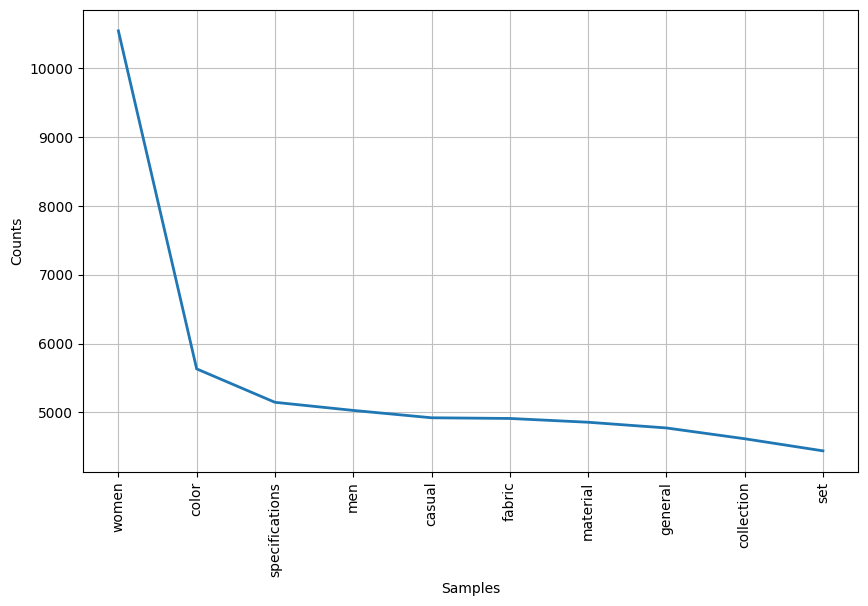

In [11]:
#most frequent words after removing domain related stopwords

# Custom stopwords list (including 'rs' and other domain-specific terms)
custom_stopwords = stopwords.words('english') + ['rs', 'type','details','guarantee','product', 'products', 'delivery', 'shipping', 'cm','price', 'features']

# Concatenate all product descriptions into a single string
a = data['description'].str.cat(sep=' ')

# Tokenize the text
words = nltk.tokenize.word_tokenize(a)

# Filter out non-alphabetic words and stopwords (both generic and domain-specific)
words = [word for word in words if re.match(r'^[a-zA-Z]+$', word) and word.lower() not in custom_stopwords]

# Create a frequency distribution of the remaining words
word_dist = nltk.FreqDist(words)

# Plot the top 10 most frequent words
plt.figure(figsize=(10, 6))
word_dist.plot(10, cumulative=False)

# Print the top 10 most frequent words
print(word_dist.most_common(10))

In [12]:
print(word_dist.most_common(15))

[('women', 10547), ('color', 5631), ('specifications', 5145), ('men', 5027), ('casual', 4920), ('fabric', 4910), ('material', 4855), ('general', 4772), ('collection', 4615), ('set', 4439), ('box', 4416), ('cotton', 4247), ('pack', 4126), ('solid', 3957), ('number', 3757)]


# Advanced Search Engine Using PyTerrier and Sentence-BERT

#Title of the Advanced Search Engine - "Hybrid Semantic Search Engine Using PyTerrier, SymSpell, and Sentence-BERT for Enhanced Product Retrieval"

#### installing required libraries and making setup

In [13]:
# Install necessary packages
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
#developed by facebook ai reasearch lab, provides tools for building and training neural networks
#url is to download the CUDA version for GPU acceleration
!pip install -U sentence-transformers
#built on top of hugging face transofrmers
"""It simplifies the process of generating dense vector representations (embeddings) of sentences,
paragraphs, or documents. These embeddings can be used for tasks like semantic search, text similarity, clustering, and more.
used in models like BERT , RoBERTa, and DistilBERT. to work on NLP models"""

!pip install python-terrier
#It provides tools for indexing, querying, and evaluating retrieval systems
!pip install nltk
#Natural Language Toolkit (NLTK), ibraries for tokenization, stemming, lemmatization, part-of-speech tagging, parsing, and more.
!pip install scikit-learn
#simple and efficient tool for data mining and data analysis, built on NumPy, SciPy, and matplotlib
!pip install symspellpy
#an efficient spelling correction algorithm.


Looking in indexes: https://download.pytorch.org/whl/cu118
INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 41.7 MB/s eta 0:00:00
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.5.1+cu124
    Uninstalling torchaudio-2.5.1+cu124:
      Successfully uninstalled torchaudio-2.5.1+cu124


In [14]:
# Import libraries
import pandas as pd# data manipulation and analysis
import numpy as np #numerical computing in Python.
import string #contains a collection of string constants (e.g., punctuation characters, digits, letters).
import re #module provides support for regular expressions.
from nltk.corpus import stopwords #list of common words (e.g., "the", "and", "is") that are often removed from text because they don't contribute much to the meaning.
from nltk.tokenize import word_tokenize # splits text into individual words or tokens.
from nltk.stem.wordnet import WordNetLemmatizer #reduces words to their base or dictionary form (lemma).
import nltk
nltk.download('punkt')# for tokenization
nltk.download('wordnet') #for lemmatization
nltk.download('stopwords') #for stopword removal

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
!pip install --upgrade python-terrier
# Initialize PyTerrier -  for information retrieval (IR) tasks.
import pyterrier as pt
# Check if PyTerrier is already initialized. If not, initialize it
if not pt.started():  # Replace pt.started() with pt.init()
    pt.init()  # This line initializes PyTerrier

# Uninstall the current torchvision
!pip uninstall -y torchvision

# Reinstall torchvision specifying the CUDA version
!pip install torchvision --index-url https://download.pytorch.org/whl/cu118


Java started and loaded: pyterrier.java, pyterrier.terrier.java [version=5.11 (build: craig.macdonald 2025-01-13 21:29), helper_version=0.0.8]
<ipython-input-15-ade515231332>:6: DeprecationWarning: Call to deprecated method pt.init(). Deprecated since version 0.11.0.
java is now started automatically with default settings. To force initialisation early, run:
pt.java.init() # optional, forces java initialisation
  pt.init()  # This line initializes PyTerrier


Found existing installation: torchvision 0.21.0+cu118
Uninstalling torchvision-0.21.0+cu118:
  Successfully uninstalled torchvision-0.21.0+cu118
Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torchvision-0.21.0%2Bcu118-cp311-cp311-linux_x86_64.whl.metadata (6.1 kB)
Using cached https://download.pytorch.org/whl/cu118/torchvision-0.21.0%2Bcu118-cp311-cp311-linux_x86_64.whl (6.5 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.18 requires torch<2.6,>=1.10, but you have torch 2.6.0+cu118 which is incompatible.


In [16]:
# Import SentenceTransformer for embeddings
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/bert-base-nli-mean-tokens')

# Import SymSpell for spelling correction
from symspellpy import SymSpell, Verbosity

#### Data preprocessing

In [17]:
# Load the dataset
df = pd.read_csv("/content/flipkart_com-ecommerce_sample.csv")

# Clean product category tree
df['product_category_tree'] = df['product_category_tree'].str.replace('>>', ',')
df['product_category_tree'] = df['product_category_tree'].str.replace('"', '')

# Drop unnecessary columns
df.drop(['product_url', 'image', "retail_price", "discounted_price",
         "is_FK_Advantage_product", "product_rating", "overall_rating", "product_specifications"],
        axis=1, inplace=True)

# Remove duplicate products
uniq_prod = df.copy()
uniq_prod.drop_duplicates(subset="product_name", keep="first", inplace=True)

# Define stopwords and punctuation
stop_words = set(stopwords.words('english'))
exclude = set(string.punctuation)
lem = WordNetLemmatizer()

# Function to clean text
def filter_keywords(doc):
    doc = doc.lower()
    stop_free = " ".join([i for i in doc.split() if i not in stop_words])
    punc_free = "".join(ch for ch in stop_free if ch not in exclude)
    word_tokens = word_tokenize(punc_free)  # Tokenize the text
    filtered_sentence = [(lem.lemmatize(w, "v")) for w in word_tokens]  # Lemmatize tokens
    return " ".join(filtered_sentence)

# Apply cleaning to relevant columns
# Convert the 'product_name' column to string before applying filter_keywords
uniq_prod['product'] = uniq_prod['product_name'].astype(str).apply(filter_keywords)
uniq_prod['brand'] = uniq_prod['brand'].astype(str).apply(filter_keywords)
uniq_prod['description'] = uniq_prod['description'].astype(str).apply(filter_keywords)

# Combine all keywords for each product
uniq_prod["keywords"] = (
    uniq_prod['product'] + " " +
    uniq_prod['brand'] + " " +
    uniq_prod['product_category_tree']
)

# Create a 'docno' column for recommendations
uniq_prod['docno'] = uniq_prod['product_name'].astype(str)

#### Spell Correction with SymSpell

In [18]:
# Download dictionaries for SymSpell
!wget https://raw.githubusercontent.com/mammothb/symspellpy/master/symspellpy/frequency_dictionary_en_82_765.txt
!wget https://raw.githubusercontent.com/mammothb/symspellpy/master/symspellpy/frequency_bigramdictionary_en_243_342.txt


--2025-02-18 11:12:15--  https://raw.githubusercontent.com/mammothb/symspellpy/master/symspellpy/frequency_dictionary_en_82_765.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1332879 (1.3M) [text/plain]
Saving to: ‘frequency_dictionary_en_82_765.txt.1’

frequency_dictionar 100%[===================>]   1.27M  --.-KB/s    in 0.06s   

2025-02-18 11:12:15 (19.9 MB/s) - ‘frequency_dictionary_en_82_765.txt.1’ saved [1332879/1332879]

--2025-02-18 11:12:15--  https://raw.githubusercontent.com/mammothb/symspellpy/master/symspellpy/frequency_bigramdictionary_en_243_342.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|1

In [19]:
# Initialize SymSpell
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)

# Load the pre-built dictionary
dictionary_path = "frequency_dictionary_en_82_765.txt"
bigram_path = "frequency_bigramdictionary_en_243_342.txt"

if not sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1):
    print("Dictionary file not found!")
if not sym_spell.load_bigram_dictionary(bigram_path, term_index=0, count_index=2):
    print("Bigram dictionary file not found!")

# Function to correct spelling
def correct_spelling(text):
    suggestions = sym_spell.lookup_compound(text, max_edit_distance=2)
    corrected_text = suggestions[0].term
    return corrected_text

# Apply spell correction to the keywords
uniq_prod["corrected_keywords"] = uniq_prod["keywords"].astype(str).apply(correct_spelling)

####  Indexing with PyTerrier

In [20]:
# Create a DataFrame for indexing
index_data = uniq_prod[['docno', 'corrected_keywords']]
index_data.columns = ['docno', 'text']

# Index the data
indexer = pt.DFIndexer("./index", overwrite=True)# creates an instance of a document frequency (DF) indexer
index_ref = indexer.index(index_data['text'], index_data['docno']) # This line indexes the documents, a reference to the created index.

# Retrieve documents using BatchRetrieve
retriever = pt.BatchRetrieve(index_ref, wmodel="BM25")

#### Semantic Search with Sentence-BERT

In [21]:
from sklearn.metrics.pairwise import cosine_similarity

# Function to compute semantic similarity
def compute_semantic_similarity(query, documents):
    query_embedding = model.encode([query])
    document_embeddings = model.encode(documents)
    similarities = cosine_similarity(query_embedding, document_embeddings).flatten()
    return similarities

#### Combined Search and Ranking

In [22]:
# Function to take user input and display results
def search_products(query):
    # Step 1: Spell correction
    corrected_query = correct_spelling(query)
    print(f"Corrected Query: {corrected_query}")

    # Step 2: Retrieve documents using BM25
    results = retriever.search(corrected_query)
    results = results.merge(uniq_prod, on='docno', how='left')

    # Step 3: Compute semantic similarity
    similarities = compute_semantic_similarity(corrected_query, results['corrected_keywords'].tolist())
    results['similarity_score'] = similarities

    # Step 4: Rank results by combining BM25 and semantic similarity
    results['final_score'] = results['score'] + results['similarity_score']
    ranked_results = results.sort_values(by='final_score', ascending=False)

    # Display top results
    return ranked_results[['product_name', 'brand', 'description', 'final_score']].head(10)

# Take user input
user_query = input("Enter your search query: ")
search_results = search_products(user_query)
print("\nSearch Results:")
search_results

Enter your search query: bike
Corrected Query: bike

Search Results:


,product_name,brand,description,final_score
0,AUTOSiTY AS101 Bike Handle Grip For Universal ...,autosity,key feature autosity as101 bike handle grip un...,11.538804
4,Speedwav 202051 Bike Handle Grip For Universal...,speedwav,key feature speedwav 202051 bike handle grip u...,11.223202
3,Speedwav 202050 Bike Handle Grip For Universal...,speedwav,key feature speedwav 202050 bike handle grip u...,11.214964
5,Speedwav 202058 Bike Handle Grip For Universal...,speedwav,key feature speedwav 202058 bike handle grip u...,11.213040
2,Speedwav 202056 Bike Handle Grip For Universal...,speedwav,key feature speedwav 202056 bike handle grip u...,11.202506
1,"Bike World Brake Light, Tail Light LED Bulb fo...",bike world,key feature bike world brake light tail light ...,11.158166
6,Xtremeonlinestore One-way Bike Alarm Kit,xtremeonlinestore,xtremeonlinestore oneway bike alarm kit beep f...,10.897164
9,"Bike World Brake Light, Tail Light LED Bulb fo...",bike world,key feature bike world brake light tail light ...,10.710555
7,"Bike World Brake Light, Tail Light LED Bulb fo...",bike world,key feature bike world brake light tail light ...,10.705532
8,"Bike World Brake Light, Tail Light LED Bulb fo...",bike world,key feature bike world brake light tail light ...,10.705403


In [23]:
# !pip install --upgrade httpx
# !pip install googletrans==4.0.0-rc1 langdetect pandas

In [24]:
# !pip install "httpx>=0.23.0,<1" --force-reinstall

In [25]:
# !pip install tabulate
!pip install langdetect googletrans==4.0.0-rc1

In [53]:
# !pip uninstall googletrans httpcore httpx -y

In [52]:
# !pip install googletrans==4.0.0-rc1 httpx==0.13.3

In [32]:
import pandas as pd
from langdetect import detect
from googletrans import Translator

translator = Translator()

def detect_language(text):
    """ Detects the language with a fallback for short English words. """
    try:
        detected_lang = detect(text)
        # If detected language is not English but text is mostly ASCII, assume English
        if detected_lang != 'en' and text.isascii():
            return 'en'
        return detected_lang
    except:
        return 'en'  # Default to English if detection fails

# Function to take user input and display results with multilingual support
def search_products(query):
    # Step 1: Detect the language
    detected_lang = detect_language(query)
    print(f"Detected Language: {detected_lang}")

    # Step 2: Translate to English (if needed)
    if detected_lang != 'en':
        query = translator.translate(query, src=detected_lang, dest='en').text
    print(f"Translated Query: {query}")

    # Step 3: Spell correction
    corrected_query = correct_spelling(query)
    print(f"Corrected Query: {corrected_query}")

    # Step 4: Retrieve documents using BM25
    results = retriever.search(corrected_query)
    results = results.merge(uniq_prod, on='docno', how='left')

    # Step 5: Compute semantic similarity
    similarities = compute_semantic_similarity(corrected_query, results['corrected_keywords'].tolist())
    results['similarity_score'] = similarities

    # Step 6: Rank results by combining BM25 and semantic similarity
    results['final_score'] = results['score'] + results['similarity_score']
    ranked_results = results.sort_values(by='final_score', ascending=False)

    # Step 7: Translate product descriptions back to the user's language
    if detected_lang != 'en':
        ranked_results.loc[:11, 'description'] = ranked_results.loc[:11, 'description'].apply(
            lambda x: translator.translate(x, src='en', dest=detected_lang).text
        )

    # Display top results
    print("\nSearch Results:")
    return ranked_results[['product_name', 'brand', 'description', 'final_score']].head(10)

# Take user input
user_query = input("Enter your search query: ")
search_results = search_products(user_query)
print(search_results)

Enter your search query: బైక్
Detected Language: te
Translated Query: Bike
Corrected Query: bike

Search Results:
                                        product_name              brand  \
0  AUTOSiTY AS101 Bike Handle Grip For Universal ...           autosity   
4  Speedwav 202051 Bike Handle Grip For Universal...           speedwav   
3  Speedwav 202050 Bike Handle Grip For Universal...           speedwav   
5  Speedwav 202058 Bike Handle Grip For Universal...           speedwav   
2  Speedwav 202056 Bike Handle Grip For Universal...           speedwav   
1  Bike World Brake Light, Tail Light LED Bulb fo...         bike world   
6           Xtremeonlinestore One-way Bike Alarm Kit  xtremeonlinestore   
9  Bike World Brake Light, Tail Light LED Bulb fo...         bike world   
7  Bike World Brake Light, Tail Light LED Bulb fo...         bike world   
8  Bike World Brake Light, Tail Light LED Bulb fo...         bike world   

                                         description  final_

# Final code including soft computng Implementation -Fuzzy logic

*************

In [33]:
# Install necessary packages
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install -U sentence-transformers
!pip install python-terrier
!pip install nltk
!pip install scikit-learn
!pip install symspellpy
!pip install fuzzywuzzy
!pip install python-Levenshtein
!pip install spacy

# Download spaCy model
!python -m spacy download en_core_web_md

Looking in indexes: https://download.pytorch.org/whl/cu118
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.7/162.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 12.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [34]:
# # Uninstall the current torchvision
# !pip uninstall -y torchvision

# # Reinstall torchvision specifying the CUDA version
# !pip install torchvision --index-url https://download.pytorch.org/whl/cu118

In [35]:
# Import libraries
import pandas as pd
import numpy as np
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Initialize PyTerrier
import pyterrier as pt
if not pt.started():
    pt.init()

# Import SentenceTransformer for embeddings
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/bert-base-nli-mean-tokens')

# Import SymSpell for spelling correction
from symspellpy import SymSpell, Verbosity

# Import FuzzyWuzzy for fuzzy matching
from fuzzywuzzy import fuzz

# Import spaCy for query expansion
import spacy
nlp = spacy.load("en_core_web_md")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [37]:
# Load the dataset

df = pd.read_csv("/content/flipkart_com-ecommerce_sample.csv")

# Clean product category tree
df['product_category_tree'] = df['product_category_tree'].str.replace('>>', ',')
df['product_category_tree'] = df['product_category_tree'].str.replace('"', '')

# Drop unnecessary columns
df.drop(['product_url', 'image', "retail_price", "discounted_price",
         "is_FK_Advantage_product", "product_rating", "overall_rating", "product_specifications"],
        axis=1, inplace=True)

# Remove duplicate products
uniq_prod = df.copy()
uniq_prod.drop_duplicates(subset="product_name", keep="first", inplace=True)

# Define stopwords and punctuation
stop_words = set(stopwords.words('english'))
exclude = set(string.punctuation)
lem = WordNetLemmatizer()

# Function to clean text
def filter_keywords(doc):
    doc = doc.lower()
    stop_free = " ".join([i for i in doc.split() if i not in stop_words])
    punc_free = "".join(ch for ch in stop_free if ch not in exclude)
    word_tokens = word_tokenize(punc_free)  # Tokenize the text
    filtered_sentence = [(lem.lemmatize(w, "v")) for w in word_tokens]  # Lemmatize tokens
    return " ".join(filtered_sentence)

# Apply cleaning to relevant columns
uniq_prod['product'] = uniq_prod['product_name'].astype(str).apply(filter_keywords)
uniq_prod['brand'] = uniq_prod['brand'].astype("str").apply(filter_keywords)
uniq_prod['description'] = uniq_prod['description'].astype(str).apply(filter_keywords)

# Combine all keywords for each product
uniq_prod["keywords"] = (
    uniq_prod['product'] + " " +
    uniq_prod['brand'] + " " +
    uniq_prod['product_category_tree']
)

# Create a 'docno' column for recommendations
uniq_prod['docno'] = uniq_prod['product_name'].astype(str)

In [38]:
from sklearn.metrics.pairwise import cosine_similarity

In [39]:
# Function to expand query with related words using spaCy
def expand_query(query, topn=5):
    expanded_words = []
    doc = nlp(query)

    for token in doc:
        # Prioritize nouns over adjectives and ensure the token has a valid vector
        if token.pos_ == "NOUN" and token.has_vector:
            try:
                # Find the most similar words to the current noun
                similar_words = [
                    word.text for word in nlp.vocab
                    if word.has_vector and nlp(token.text).similarity(nlp(word.text)) > 0.7
                ][:topn]
                expanded_words.extend(similar_words)
            except KeyError:
                continue

    # Remove duplicates and filter out irrelevant words
    expanded_words = list(set(expanded_words))
    return " ".join(expanded_words)

In [40]:
# # Download dictionaries for SymSpell
# !wget https://raw.githubusercontent.com/mammothb/symspellpy/master/symspellpy/frequency_dictionary_en_82_765.txt
# !wget https://raw.githubusercontent.com/mammothb/symspellpy/master/symspellpy/frequency_bigramdictionary_en_243_342.txt

In [41]:
# Initialize SymSpell
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)

# Load the pre-built dictionary
dictionary_path = "frequency_dictionary_en_82_765.txt"
bigram_path = "frequency_bigramdictionary_en_243_342.txt"

if not sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1):
    print("Dictionary file not found!")
if not sym_spell.load_bigram_dictionary(bigram_path, term_index=0, count_index=2):
    print("Bigram dictionary file not found!")

# Function to correct spelling
def correct_spelling(text):
    suggestions = sym_spell.lookup_compound(text, max_edit_distance=2)
    corrected_text = suggestions[0].term
    return corrected_text

# Apply spell correction to the keywords
uniq_prod["corrected_keywords"] = uniq_prod["keywords"].astype(str).apply(correct_spelling)

In [42]:
# Create a DataFrame for indexing
index_data = uniq_prod[['docno', 'corrected_keywords']]
index_data.columns = ['docno', 'text']

# Index the data
indexer = pt.DFIndexer("./index", overwrite=True)
index_ref = indexer.index(index_data['text'], index_data['docno'])

# Retrieve documents using BatchRetrieve
retriever = pt.BatchRetrieve(index_ref, wmodel="BM25")

In [43]:
# Function to compute fuzzy relevance score
def fuzzy_relevance(query, product_name, description, brand):
    name_similarity = fuzz.token_set_ratio(query, product_name)
    desc_similarity = fuzz.token_set_ratio(query, description)
    brand_similarity = fuzz.token_set_ratio(query, brand)
    partial_similarity = fuzz.partial_ratio(query, product_name + " " + description)
    return 0.3 * name_similarity + 0.3 * brand_similarity + 0.2 * desc_similarity + 0.2 * partial_similarity
    # return 0.5 * name_similarity + 0.3 * desc_similarity + 0.2 * partial_similarity


from nltk.corpus import wordnet

def infer_category(category):
    category_synsets = wordnet.synsets(category)
    hyponyms = set()

    for synset in category_synsets:
        for hyponym in synset.hyponyms():  # Get specific items under the category
            hyponyms.update(hyponym.lemma_names())

    return list(hyponyms)

# print(get_hyponyms("furniture"))  # Output: ['sofa', 'bed', 'chair', 'table', etc.]


# Filter results by inferred category
def filter_by_category(results, query):
    category = infer_category(query)
    if category:
        results = results[results['product_category_tree'].str.contains(category, case=False)]
    return results

In [44]:
# Function to handle search and display results
def search_products_with_embeddings(query):
    # Step 1: Spell correction
    corrected_query = correct_spelling(query)
    print(f"Corrected Query: {corrected_query}")


    # Step 2: Expand query with related words
    expanded_query = f"{query} {corrected_query} {expand_query(corrected_query)}"
    print(expanded_query)


    # Step 3: Retrieve documents using BM25
    results = retriever.search(expanded_query)
    results = results.merge(uniq_prod, on="docno", how="left")
    pre_semantic_results = results.copy()


    # Step 4: Filter by category
    results = filter_by_category(results, expanded_query)
    print(f"Results count after category filter: {len(results)}")


    # Step 5: Compute semantic similarity
    try:
        query_embedding = model.encode([expanded_query])
        document_embeddings = model.encode(results["corrected_keywords"].tolist())

        if not len(document_embeddings):
            print("No valid embeddings found for the retrieved documents.")
            return suggest_alternatives(query, pre_semantic_results)

        results["similarity_score"] = cosine_similarity(query_embedding, document_embeddings).flatten()
    except Exception as e:
        print(f"Error during semantic similarity computation: {e}")
        return suggest_alternatives(query, pre_semantic_results)



    # Step 6: Compute fuzzy relevance
    results["fuzzy_score"] = results.apply(
        lambda row: fuzzy_relevance(expanded_query, row["product_name"], row["description"], row["brand"]),
        axis=1,
    )



    # Step 7: Filter results based on semantic similarity threshold
    SEMANTIC_THRESHOLD = 0.6
    results = results[results["similarity_score"] >= SEMANTIC_THRESHOLD]



    # Step 8: Rank results by combining BM25, semantic similarity, and fuzzy scores
    results["final_score"] = (
        results["score"] * 0.5 + results["similarity_score"] * 0.3 + results["fuzzy_score"] * 0.2
    )
    ranked_results = results.sort_values(by="final_score", ascending=False)
    print(f"Final results count: {len(ranked_results)}")



    # Step 9 If final results are still < 5, expand the query further and repeat search
    if len(ranked_results) < 5:
        inferred_category = " ".join(infer_category(query))
        if inferred_category.strip():
            print("Expanding query further for better results...")
            additional_expansion = expand_query(inferred_category)

            if additional_expansion.strip():
                expanded_query += f" {additional_expansion}"
                results = retriever.search(expanded_query).merge(uniq_prod, on="docno", how="left")

                # Repeat Steps 4-8 for updated results
                results = filter_by_category(results, expanded_query)

                try:
                    query_embedding = model.encode([expanded_query])
                    document_embeddings = model.encode(results["corrected_keywords"].tolist())

                    if len(document_embeddings) > 0:
                        results["similarity_score"] = cosine_similarity(query_embedding, document_embeddings).flatten()
                except Exception as e:
                    print(f"Error during semantic similarity computation: {e}")
                    return suggest_alternatives(query, pre_semantic_results)

                results["fuzzy_score"] = results.apply(
                    lambda row: fuzzy_relevance(expanded_query, row["product_name"], row["description"], row["brand"]),
                    axis=1,
                )

                results = results[results["similarity_score"] >= SEMANTIC_THRESHOLD]

                results["final_score"] = (
                    results["score"] * 0.5 + results["similarity_score"] * 0.3 + results["fuzzy_score"] * 0.2
                )

                ranked_results = pd.concat([ranked_results, results.sort_values(by="final_score", ascending=False)])

            print(f"Results count after additional expansion: {len(ranked_results)}")


    # Display results or suggest alternatives
    if len(ranked_results)<5:
        if ranked_results.empty:
            print("Product not available.")
            if results.empty:
                print("No products found after semantic filtering. Returning pre-semantic results.")
            print(ranked_results[["product_name", "brand", "description", "final_score"]].head(20))
            return suggest_alternatives(query, pre_semantic_results)
        return suggest_alternatives(query, pre_semantic_results)

    # # return ranked_results[["product_name", "brand", "description", "final_score"]].head(20)

# if len(ranked_results) < 5:
#     print(ranked_results[["product_name", "brand", "description", "final_score"]].head(20))

#     if ranked_results.empty:
#         print("Product not available.")

#         if results.empty:
#             print("No products found after semantic filtering. Returning pre-semantic results.")

#         return suggest_alternatives(query, pre_semantic_results)

#     return suggest_alternatives(query, pre_semantic_results)



# Suggest alternative products if no match is found
def suggest_alternatives(query, pre_semantic_results):
    suggestions = retriever.search(query).merge(uniq_prod, on="docno", how="left")
    if suggestions.empty:
        return pre_semantic_results[["product_name", "brand", "description"]].head(30)

    return suggestions[["product_name", "brand", "description"]].head(30)


In [49]:
# Take user input
user_query = input("Enter your search query: ")
search_results = search_products_with_embeddings(user_query)
print("\nSearch Results:")
search_results

Enter your search query: bike
Detected Language: en
Processed Query: bike
Corrected Query: bike
Expanded Query: bike bike
Results after category filter: 178

Search Results:


,product_name,brand,description,final_score
35,OEM 170774 Bike Side Stand,oem,specifications oem 170774 bike side stand gene...,19.906471


In [55]:
# Take user input
user_query = input("Enter your search query: ")
search_results = search_products_with_embeddings(user_query)
print("\nSearch Results:")
search_results

Enter your search query: cycle
Detected Language: en
Processed Query: cycle
Corrected Query: cycle
Expanded Query: cycle cycle
Results after category filter: 14

Search Results:


,product_name,brand,description
0,Quoface Day and Night Vision Cycling Goggles,quoface,quoface day night vision cycle goggle black pr...
1,Alisha Solid Women's Cycling Shorts,alisha,key feature alisha solid womens cycle short co...
2,"Knight Ace Kraasa Sports Running Shoes, Cyclin...",knight ace,key feature knight ace kraasa sport run shoe c...
3,"Mynte Solid Women's Cycling Shorts, Gym Shorts...",mynte,key feature mynte solid womens cycle short gym...
4,Quoface Day And Night Vision Car And Bike Driv...,quoface,key feature quoface day night vision car bike ...
5,720 Armour Tack B318-8 Sports Goggles,720 armour,key feature 720 armour tack b3188 sport goggle...
6,720 Armour Slew T920-2 Sports Goggles,720 armour,key feature 720 armour slew t9202 sport goggle...
7,720 Armour Hitman T948D1-3-P Sports Goggles,720 armour,key feature 720 armour hitman t948d13p sport g...
8,You2Deal Wood & Iron Handicraft Antique Style ...,you2deal,you2deal wood iron handicraft antique style ho...
9,720 Armour Hitman Asian Fit T948B2-18-H-P Spor...,720 armour,key feature 720 armour hitman asian fit t948b2...


In [50]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from googletrans import Translator

translator = Translator()

def search_products_with_embeddings(query):
    # Step 1: Translate to English with auto-detection
    try:
        translated_result = translator.translate(query, dest='en')
        detected_lang = translated_result.src
        processed_query = translated_result.text
    except Exception as e:
        print(f"Translation error: {e}")
        detected_lang = 'en'
        processed_query = query

    print(f"Detected Language: {detected_lang}")
    print(f"Processed Query: {processed_query}")

    # Step 2: Spell correction
    corrected_query = correct_spelling(processed_query)
    print(f"Corrected Query: {corrected_query}")

    # Step 3: Query expansion
    query_expansion = expand_query(corrected_query)
    expanded_query = f"{corrected_query} {query_expansion}".strip()
    print(f"Expanded Query: {expanded_query}")

    # Step 4: BM25 retrieval
    results = retriever.search(expanded_query)
    results = results.merge(uniq_prod, on="docno", how="left")

    if results.empty:
        return suggest_alternatives(expanded_query, results, detected_lang)

    # Step 5: Category filtering
    results = filter_by_category(results, expanded_query)
    print(f"Results after category filter: {len(results)}")

    if results.empty:
        return suggest_alternatives(expanded_query, results, detected_lang)

    # Step 6: Semantic similarity
    try:
        query_embedding = model.encode([expanded_query])
        doc_embeddings = model.encode(results["corrected_keywords"].tolist())

        if len(doc_embeddings) == 0:
            return suggest_alternatives(expanded_query, results, detected_lang)

        results["similarity_score"] = cosine_similarity(query_embedding, doc_embeddings).flatten()
    except Exception as e:
        print(f"Embedding error: {e}")
        return suggest_alternatives(expanded_query, results, detected_lang)

    # Step 7: Fuzzy matching
    results["fuzzy_score"] = results.apply(
        lambda row: fuzzy_relevance(expanded_query, row["product_name"],
                                  row["description"], row["brand"]), axis=1
    )

    # Step 8: Threshold filtering
    results = results[results["similarity_score"] >= 0.6]
    if results.empty:
        return suggest_alternatives(expanded_query, results, detected_lang)

    # Step 9: Final ranking
    results["final_score"] = (results["score"] * 0.5 +
                             results["similarity_score"] * 0.3 +
                             results["fuzzy_score"] * 0.2)
    ranked_results = results.sort_values("final_score", ascending=False)

    # Step 10: Query expansion for low results
    if len(ranked_results) < 5:
        inferred_category = " ".join(infer_category(expanded_query))
        additional_expansion = expand_query(inferred_category)
        if additional_expansion:
            expanded_query += f" {additional_expansion}"
            additional_results = retriever.search(expanded_query).merge(uniq_prod, on="docno", how="left")
            # ... (rest of expansion logic)

    # Step 11: Translate results if needed
    if detected_lang != 'en':
        try:
            ranked_results = translate_descriptions(ranked_results, detected_lang)
        except Exception as e:
            print(f"Translation failed: {e}")

    return ranked_results[["product_name", "brand", "description", "final_score"]].head(10)

def translate_descriptions(df, target_lang):
    """Translate descriptions to target language"""
    df = df.copy()
    top_results = df.head(10)
    top_results["description"] = top_results["description"].apply(
        lambda x: translator.translate(x, src='en', dest=target_lang).text
        if isinstance(x, str) else x
    )
    df.update(top_results)
    return df

def suggest_alternatives(query, results, lang):
    """Handle alternative suggestions with proper translation"""
    suggestions = retriever.search(query).merge(uniq_prod, on="docno", how="left")

    if lang != 'en' and not suggestions.empty:
        suggestions = translate_descriptions(suggestions, lang)

    return suggestions[["product_name", "brand", "description"]].head(10)

In [51]:
# Take user input
user_query = input("Enter your search query: ")
search_results = search_products_with_embeddings(user_query)
print("\nSearch Results:")
search_results

Enter your search query: బైక్
Detected Language: te
Processed Query: Bike
Corrected Query: bike
Expanded Query: bike bike
Results after category filter: 178

Search Results:


,product_name,brand,description,final_score
35,OEM 170774 Bike Side Stand,oem,స్పెసిఫికేషన్స్ OEM 170774 బైక్ సైడ్ స్టాండ్ జ...,19.906471


In [54]:
# Take user input
user_query = input("Enter your search query: ")
search_results = search_products_with_embeddings(user_query)
print("\nSearch Results:")
search_results

Enter your search query: చక్రం
Detected Language: te
Processed Query: Wheel
Corrected Query: wheel
Expanded Query: wheel wheel
Results after category filter: 47

Search Results:


,product_name,brand,description
0,Jheel Slim Fit Girl's Jeans,jheel,స్పెసిఫికేషన్స్ జీల్ స్లిమ్ ఫిట్ గర్ల్స్ జీన్స...
1,Hot Wheels Graphic Print Skull Cap,hot wheel,స్పెసిఫికేషన్స్ హాట్ వీల్ గ్రాఫిక్ ప్రింట్ స్క...
2,Mount Nano MN 110 250 ml Wheel Tire Cleaner,mount nano,కీ ఫీచర్ మౌంట్ నానో ఎంఎన్ 110 250 ఎంఎల్ వీల్ ట...
3,SkyWheels V_Magnetic_Art21 Sun Shade For Nissa...,skywheels,కీ ఫీచర్ స్కైవీల్స్ vmagnagneticart21 సన్ షేడ్...
4,Auto Wheel Garage FSNLD_BOLERO Door Sill Plate,auto wheel garage,ఆటో వీల్ గ్యారేజ్ fsnldbolero తలుపు గుమ్మం గుమ...
5,Shopizone BMW Wheel 32 GB Pen Drive,shopizone,కీ ఫీచర్ షాపిజోన్ బిఎమ్‌డబ్ల్యూ వీల్ 32 జిబి ప...
6,Shop4everything Mettalic DIE CAST Alloy wheel ...,shop4everything,కీ ఫీచర్ షాప్ 4 ప్రతి ఒక్కరూ మెట్టాలిక్ డై కాస...
7,PRINT SHAPES 3D feather wheel Laptop Skin with...,print shape,కీ ఫీచర్ ప్రింట్ ఆకారం 3 డి ఫెదర్ వీల్ ల్యాప్‌...
8,EON Wheel Pizza Cutter,eon,EON వీల్ పిజ్జా కట్టర్ RS249 ఆన్‌లైన్ EON వీల్...
9,Gosome Free Style 4 Wheels Roller Blades In-li...,nan,గోసోమ్ ఫ్రీస్టైల్ 4 వీల్ రోలర్ బ్లేడ్స్ ఇన్లైన...
